In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('sms_spam_dataset.csv', encoding="latin-1")

In [6]:
data=data[['v1', 'v2']]
data.columns=['label', 'message']


In [7]:
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['label']=data['label'].map({'ham':0, 'spam':1})

/tmp/ipython-input-1063924179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=data['label'].map({'ham':0, 'spam':1})


In [11]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:

print(data['label'].value_counts())

label
0    4825
1     747
Name: count, dtype: int64


In [16]:
x_train , x_test, y_train, y_test=train_test_split(data['message'], data['label'], test_size=0.2, random_state=42, stratify=data['label'])

In [18]:
vect = CountVectorizer(stop_words='english', lowercase=True)
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [29]:
mnb=MultinomialNB(alpha=0.2)
mnb.fit(x_train, y_train)

# predict the test data
y_predmnb=mnb.predict(x_test)
y_probmnb=mnb.predict_proba(x_test)

print(y_predmnb)
print(y_test)
print(y_probmnb[:, 1])


[0 0 0 ... 0 0 0]
2826    0
3695    0
3906    0
575     1
2899    0
       ..
854     0
5044    0
2015    0
3381    0
785     0
Name: label, Length: 1115, dtype: int64
[3.38009841e-16 1.45221624e-04 7.08191999e-06 ... 1.58769710e-08
 5.35589422e-04 1.44713811e-04]


In [25]:
print(accuracy_score(y_test, y_predmnb))
print(classification_report(y_test, y_predmnb, target_names=['Ham', 'spam']))

0.9856502242152466
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        spam       0.97      0.92      0.94       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Small data set for SMS span detection

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Training Data
X_train = [
    "free money now",
    "win free prize today",
    "hey meeting tomorrow",
    "free meeting at noon",
    "congratulations you won thousand"
]
y_train = ["spam", "spam", "ham", "ham", "spam"]

# Vectorizer (Bag of Words with Laplace smoothing handled internally)
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_train)

# Train Multinomial NB
clf = MultinomialNB(alpha=1)  # alpha=1 → Laplace smoothing
clf.fit(X_vec, y_train)

# Test
test_msg = ["join meeting today"]
test_vec = vectorizer.transform(test_msg)

# Predict
pred = clf.predict(test_vec)
proba = clf.predict_proba(test_vec)

print("Prediction:", pred)
print("Probabilities (ham, spam):", proba)

# Feature names (words)
print("\nVocabulary:")
for word, idx in vectorizer.vocabulary_.items():
    print(f"{word} → {idx}")

Prediction: ['ham']
Probabilities (ham, spam): [[0.58275862 0.41724138]]

Vocabulary:
free → 2
money → 5
now → 7
win → 12
prize → 8
today → 10
hey → 3
meeting → 4
tomorrow → 11
at → 0
noon → 6
congratulations → 1
you → 14
won → 13
thousand → 9


### Comparision MNB and LogR

[0.00642398 0.04545455 0.28571429 0.42857143 0.         0.
 0.5        0.98550725]
[0.00350125 0.14814016 0.25127139 0.370951   0.44387243 0.56687995
 0.82172128 0.99874555]


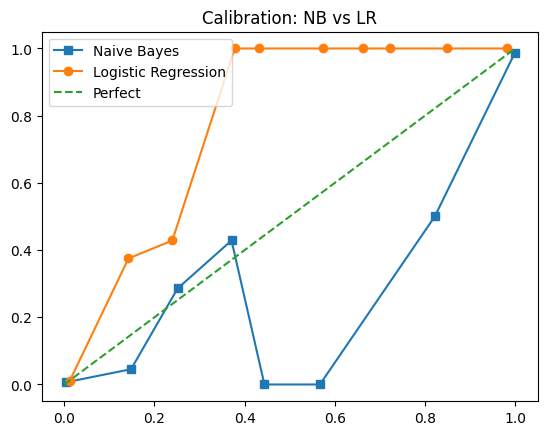

In [34]:


# Plot calibration
prob_nb = mnb.predict_proba(x_test)[:,1]
prob_lr = LogisticRegression().fit(x_train, y_train).predict_proba(x_test)[:,1]

fop_nb, mpv_nb = calibration_curve(y_test, prob_nb, n_bins=10)
fop_lr, mpv_lr = calibration_curve(y_test, prob_lr, n_bins=10)

print(fop_nb)
print(mpv_nb)

plt.plot(mpv_nb, fop_nb, 's-', label='Naive Bayes')
plt.plot(mpv_lr, fop_lr, 'o-', label='Logistic Regression')
plt.plot([0,1], [0,1], '--', label='Perfect')
plt.legend()
plt.title("Calibration: NB vs LR")
plt.show()

In [ ]:
'''

calibration_curve ya method kiya kaam karata hai minglish mai samjhao
Sure, I can explain what the calibration_curve method does in Minglish.

Basically, calibration_curve is a function in scikit-learn that helps you check how "calibrated" your model's predicted probabilities are.

Think of it like this: jab aapka model predict karta hai ki koi cheez hone ka probability 80% hai, toh kya sach mein woh cheez 80% time hoti hai? calibration_curve yeh check karta hai.

It plots two things:

Mean Predicted Value (MPV): Yeh aapke model ki average predicted probability hai for different "bins" (groups) of predictions.
Fraction of Positives (FoP): Yeh uss bin mein actual positive cases ka fraction hai.
Agar aapka model perfectly calibrated hai, toh MPV aur FoP almost same honge. Plot mein, yeh ek straight line banayega 45-degree pe (jo "Perfect" line hai plot mein).

Agar aapka model under-calibrated hai, toh uski predicted probabilities actual probabilities se kam hongi. Plot mein, line "Perfect" line ke niche hogi.

Agar aapka model over-calibrated hai, toh uski predicted probabilities actual probabilities se zyada hongi. Plot mein, line "Perfect" line ke upar hogi.

Jo plot aapne generate kiya hai, usmein aap dekh sakte hain ki Logistic Regression ki line "Perfect" line ke zyada close hai Naive Bayes ke comparison mein. Iska matlab hai ki Logistic Regression ka model Naive Bayes se zyada better calibrated hai.


Please explain this code:

You're asking about the stratify parameter in the train_test_split function.


yes
Okay, I'll explain the stratify parameter in the train_test_split function.

The stratify parameter is used to ensure that the split of your data into training and testing sets maintains the same proportion of the target variable (in your case, the 'label' column, which indicates whether an SMS is spam or not) as the original dataset.

Let's say in your original data DataFrame, 15% of the SMS messages are spam and 85% are ham. If you use train_test_split with stratify=data['label'], the resulting x_train, x_test, y_train, and y_test will also have approximately 15% spam and 85% ham.

This is particularly important when you have an imbalanced dataset, like the one you have (4825 ham vs 747 spam). If you don't use stratify, there's a chance that your training or testing set could end up with a significantly different proportion of spam and ham messages than the original data. This could lead to a model that performs well on one class but poorly on the other, and its overall performance might be misleading.

By using stratify, you ensure that both your training and testing sets are representative of the overall data distribution, which helps in building a more robust and reliable model.

Does that explanation make sense? Would you like me to explain any other part of the code?


only response minglish language
Sure! Main aapko stratify parameter train_test_split function mein Minglish mein samjhaata hoon.

stratify parameter ka matlab hai ki jab aap apne data ko train aur test sets mein divide karte hain, toh aap yeh ensure karte hain ki aapki target variable (iss case mein 'label' column, jo batata hai ki SMS spam hai ya nahi) ka distribution original dataset ke jaisa hi rahe.

Simple terms mein, agar aapke original data mein 15% SMS spam hain aur 85% ham hain, toh stratify=data['label'] use karne se aapke x_train, x_test, y_train, aur y_test mein bhi lagbhag 15% spam aur 85% ham honge.

Yeh bahut important hai, especially jab aapke paas imbalanced dataset ho, jaise aapka hai (4825 ham vs 747 spam). Agar aap stratify use nahi karte hain, toh chances hain ki aapke train ya test set mein spam aur ham ka proportion original data se alag ho sakta hai. Isse aapka model ek class pe accha perform kar sakta hai aur doosre pe nahi, aur overall performance galat ho sakti hai.

stratify use karke, aap yeh ensure karte hain ki aapke train aur test sets dono data ke overall distribution ko represent karte hain, jisse aap ek zyada reliable model bana sakte hain.

Kya yeh explanation aapko samajh mein aaya? Kuch aur poochhna hai?


Please explain this code:

Ji haan, main aapko CountVectorizer ke baare mein Minglish mein batata hoon.

CountVectorizer ek tool hai jo text data ko machine learning models ke liye numeric data mein convert karta hai. Iska kaam yeh hai ki yeh aapke text messages mein se words (ya "tokens") ko count karke ek matrix banata hai.

Yeh kaise kaam karta hai:

Vocabulary Banata Hai: Pehle, yeh aapke saare training messages mein se saare unique words ki list banata hai. Is list ko vocabulary kehte hain.
Matrix Banata Hai: Phir, har message ke liye, yeh count karta hai ki vocabulary ka har word uss message mein kitni baar aaya hai. Isse ek matrix banti hai jismein rows messages hote hain aur columns vocabulary ke words hote hain. Cell ki value batati hai ki woh particular word uss message mein kitni baar repeat hua hai.
Aapke code mein:

vect = CountVectorizer(stop_words='english', lowercase=True): Yahaan aap CountVectorizer ka ek object bana rahe hain.
stop_words='english' ka matlab hai ki common English words jaise "the", "a", "is" ko ignore kiya jayega kyunki yeh zyada information nahi dete spam detection mein.
lowercase=True ka matlab hai ki saare words ko lowercase mein convert kiya jayega (jaise "Free" aur "free" ko ek hi word mana jayega).
x_train=vect.fit_transform(x_train): Yeh step sabse important hai.
fit() method x_train ke messages ko dekhega aur vocabulary banayega.
transform() method x_train ke messages ko uss vocabulary ke hisaab se numeric matrix mein convert karega.
x_test=vect.transform(x_test): Yahaan aap x_test ke messages ko numeric matrix mein convert kar rahe hain, lekin yeh naye words se vocabulary ko update nahi karega. Yeh wohi vocabulary use karega jo x_train se bani thi.
Is matrix ko phir machine learning models (jaise Naive Bayes) use karte hain spam ko detect karne ke liye.

Koi aur sawal hai?

'''